In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [212]:
df=pd.read_csv('/Users/apple/Desktop/5291 Airbnb/Processed_Data2.csv')
df2=pd.read_csv('/Users/apple/Desktop/5291 Airbnb/Processed_Data.csv')

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38315 entries, 0 to 38314
Columns: 212 entries, host_is_superhost to review_scores_rating
dtypes: float64(5), int64(206), object(1)
memory usage: 62.0+ MB


In [214]:
df.columns

Index(['host_is_superhost', 'property_type_Apartment',
       'property_type_Guest suite', 'property_type_House',
       'property_type_Loft', 'property_type_Townhouse',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Boutique hotel', 'property_type_Tiny house',
       ...
       'host_verification_sent_id', 'host_verification_manual_offline',
       'host_verification_photographer', 'host_verification_weibo',
       'host_verification_sesame', 'host_verification_sesame_offline',
       'host_verification_zhima_selfie', 'cleaning_fee',
       'neighbourhood_cleansed', 'review_scores_rating'],
      dtype='object', length=212)

In [215]:
df.head()

,host_is_superhost,property_type_Apartment,property_type_Guest suite,property_type_House,property_type_Loft,property_type_Townhouse,property_type_Bed and breakfast,property_type_Condominium,property_type_Boutique hotel,property_type_Tiny house,...,host_verification_sent_id,host_verification_manual_offline,host_verification_photographer,host_verification_weibo,host_verification_sesame,host_verification_sesame_offline,host_verification_zhima_selfie,cleaning_fee,neighbourhood_cleansed,review_scores_rating
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,60,Harlem,93
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,Kensington,98
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,100,Midtown,94
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,125,Williamsburg,97
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Clinton Hill,91


In [216]:
# Summary statistic numeric 
df[['review_scores_rating','cleaning_fee','deposit_price_ratio','extra_charge_price_ratio','price','reviews_per_month',
                'bathrooms','bedrooms']].describe()

,review_scores_rating,cleaning_fee,deposit_price_ratio,extra_charge_price_ratio,price,reviews_per_month,bathrooms,bedrooms
count,38315.000000,38315.000000,38315.000000,38315.000000,38315.000000,38315.000000,38315.000000,38315.000000
mean,93.694584,50.823829,1.397106,0.158181,141.232233,1.372948,1.130562,1.176406
std,8.546930,51.478524,3.163034,0.297610,179.974029,1.606378,0.424067,0.749078
min,20.000000,0.000000,0.000000,0.000000,10.000000,0.010000,0.000000,0.000000
25%,91.000000,10.000000,0.000000,0.000000,69.000000,0.220000,1.000000,1.000000
50%,96.000000,40.000000,0.000000,0.071942,105.000000,0.740000,1.000000,1.000000
75%,100.000000,79.000000,1.818182,0.230769,170.000000,2.010000,1.000000,1.000000
max,100.000000,625.000000,100.000000,10.000000,10000.000000,18.800000,15.500000,14.000000


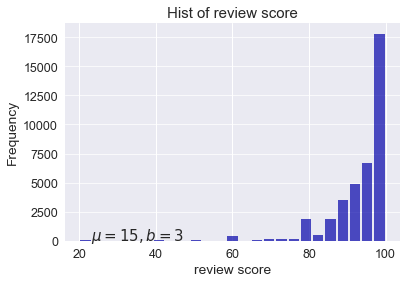

In [275]:
# Uivarate analysis 
# reivew score 
n, bins, patches = plt.hist(x=df['review_scores_rating'], bins=25, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('review score')
plt.ylabel('Frequency')
plt.title('Hist of review score')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()

In [ ]:
print("Skewness:%f" % df['review_scores_rating'].skew())
print("Kurtosis: %f" % df['review_scores_rating'].kurt())

(0, 300)

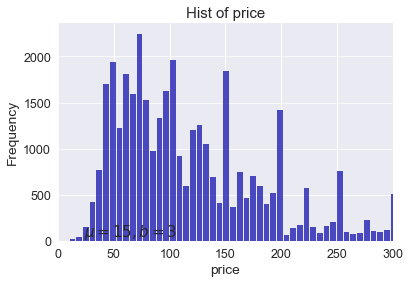

In [285]:
n, bins, patches = plt.hist(x=df['price'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Hist of price')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.xlim(0,300)

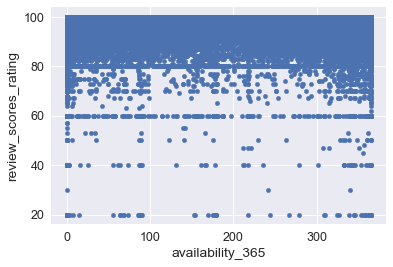

In [218]:
# Bivaraite analysis
# relationship with numercial varaible
var='availability_365'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='review_scores_rating')

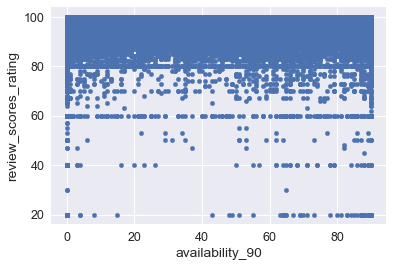

In [219]:
var='availability_90'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='review_scores_rating')

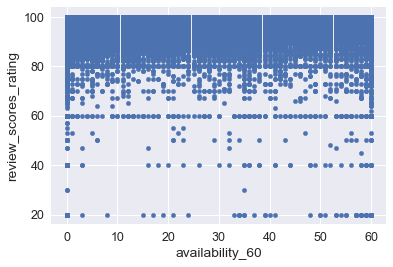

In [220]:
var='availability_60'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='review_scores_rating')

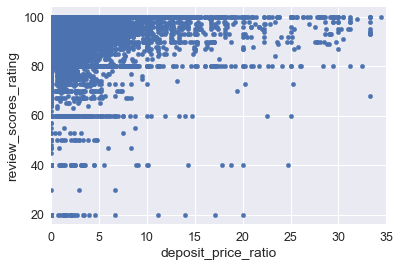

In [221]:
var='deposit_price_ratio'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='review_scores_rating',xlim=(0,35))

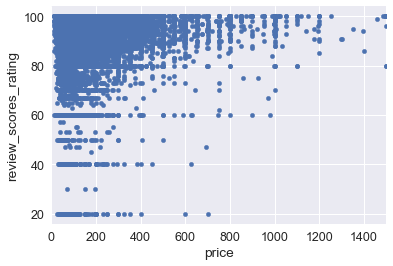

In [222]:
var='price'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='review_scores_rating', xlim=(0,1500))

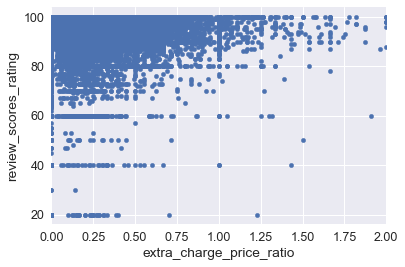

In [223]:
var= 'extra_charge_price_ratio'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='review_scores_rating',xlim=(0,2))

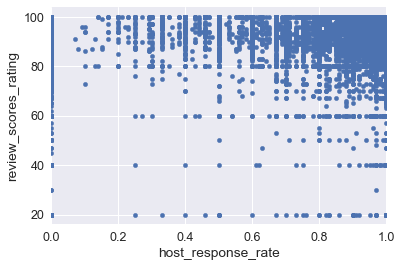

In [224]:
var='host_response_rate'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='review_scores_rating',xlim=(0,1))

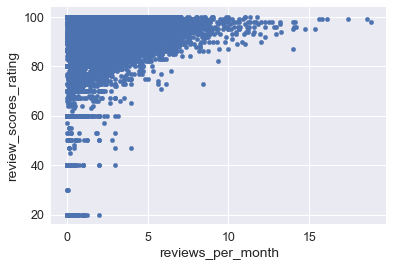

In [225]:
var = 'reviews_per_month'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='review_scores_rating')

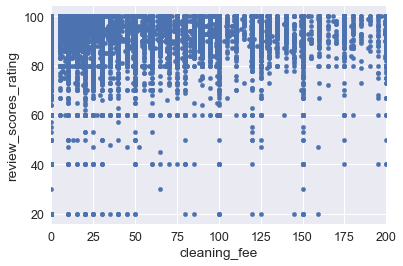

In [226]:
var = 'cleaning_fee'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='review_scores_rating',xlim=(0,200))

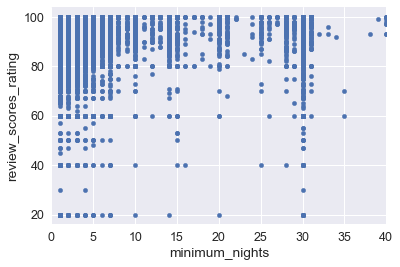

In [227]:
var = 'minimum_nights'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='review_scores_rating',xlim=(0,40))

In [228]:
location_count = df['neighbourhood_cleansed'].value_counts()
location_count=location_count [:7]
location_count

Williamsburg          3244
Bedford-Stuyvesant    2803
Harlem                2294
Bushwick              1847
East Village          1640
Hell's Kitchen        1635
Upper West Side       1608
Name: neighbourhood_cleansed, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

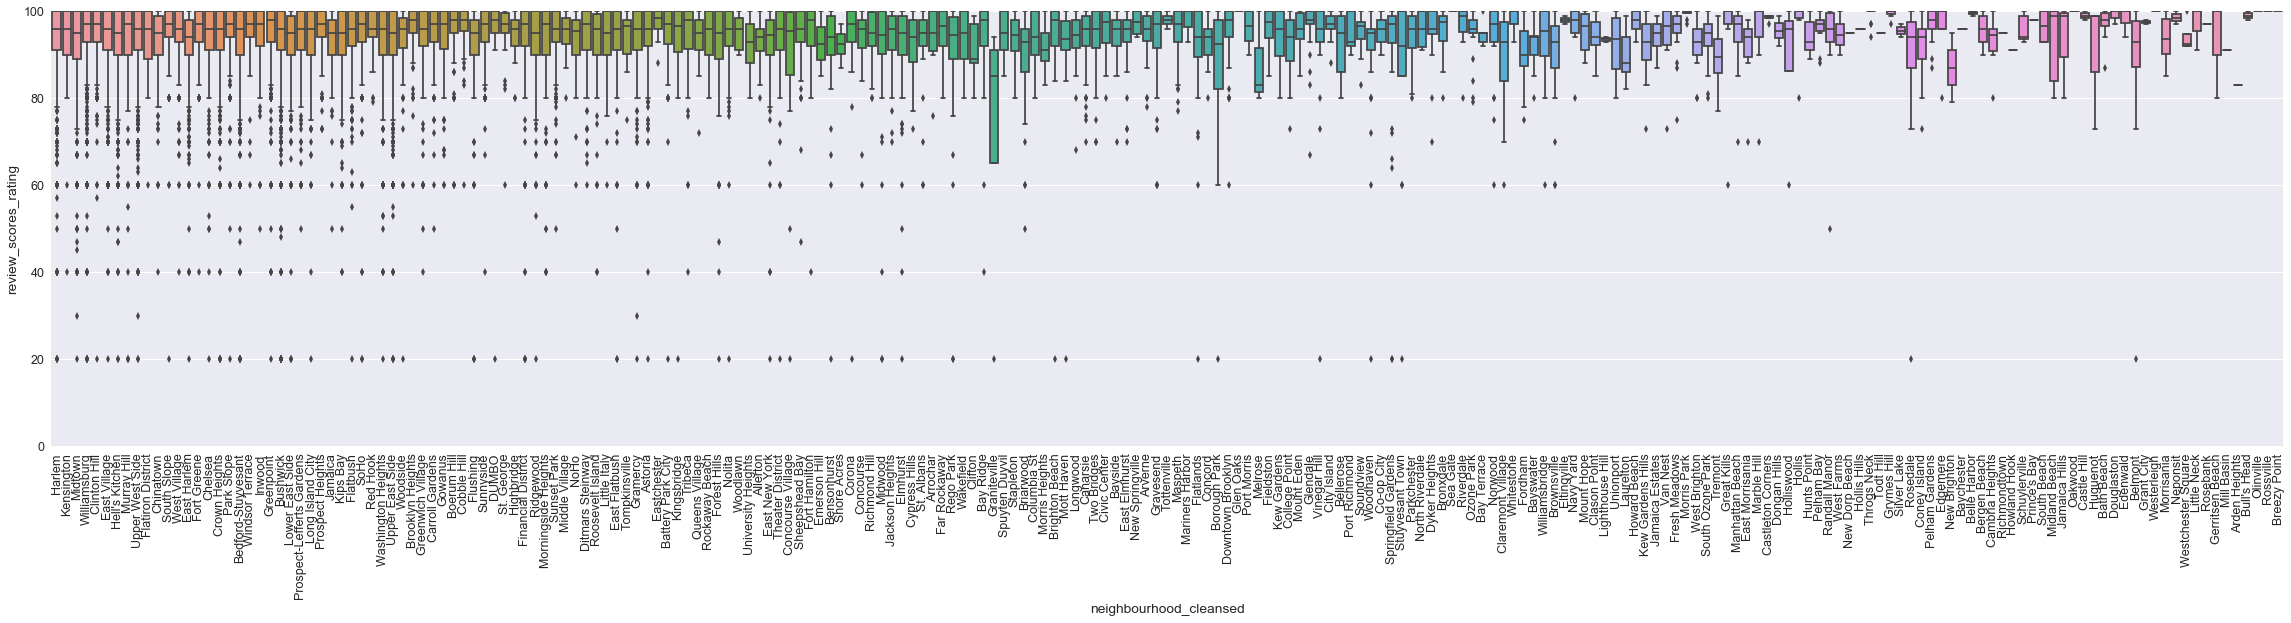

In [229]:
var = 'neighbourhood_cleansed'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(40, 8))
fig = sns.boxplot(x=var, y="review_scores_rating", data=data)
fig.axis(ymin=0, ymax=100)
plt.xticks(rotation=90)

In [230]:
s=df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()
s.sort_values(ascending=False)

neighbourhood_cleansed
Olinville              100.000000
Rossville              100.000000
Sea Gate               100.000000
Glen Oaks              100.000000
Oakwood                100.000000
Breezy Point           100.000000
Westerleigh            100.000000
Belle Harbor            99.500000
Morris Park             99.375000
Grymes Hill             99.333333
Douglaston              99.142857
Throgs Neck             99.076923
Castle Hill             99.000000
Bull's Head             99.000000
Castleton Corners       98.500000
Neponsit                98.500000
Edenwald                98.375000
Whitestone              98.142857
Eltingville             98.000000
Tottenville             98.000000
Mariners Harbor         98.000000
Prince's Bay            98.000000
Howard Beach            97.769231
Grant City              97.500000
New Springville         97.250000
Pelham Gardens          97.136364
Bath Beach              97.090909
Rosebank                97.000000
Little Neck             9

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

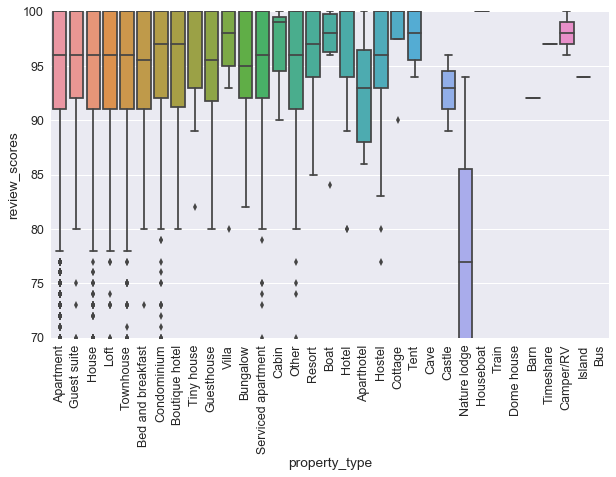

In [231]:
var = 'property_type'
data = pd.concat([df2['review_scores'], df2[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="review_scores", data=data)
fig.axis(ymin=70, ymax=100)
plt.xticks(rotation=90)

In [232]:
d={'review_scores': ['mean' , 'count']}
review_property=df2[['review_scores','property_type']]
review_property_mean=review_property.groupby('property_type').agg(d).round(2)
review_property_mean

review_scores       
                            mean  count
property_type                          
Aparthotel                 92.57      7
Apartment                  93.70  31250
Barn                       92.00      1
Bed and breakfast          92.52     86
Boat                       96.00      6
Boutique hotel             94.64     66
Bungalow                   95.19     21
Bus                          NaN      0
Cabin                      96.33      3
Camper/RV                  98.00      2
Castle                     92.67      3
Cave                         NaN      0
Condominium                94.20    819
Cottage                    97.50      4
Dome house                   NaN      0
Guest suite                94.47    172
Guesthouse                 93.88     32
Hostel                     94.97     32
Hotel                      95.29     17
House                      93.71   2771
Houseboat                 100.00      1
Island                     94.00      1
Loft                       93.93   1148
Nature lodge               77.00      2
Other                      93.58    143
Resort                     96.03     73
Serviced apartment         93.84    432
Tent                       97.50      4
Timeshare                  97.00      1
Tiny house                 95.67      9
Townhouse                  93.97   1199
Train                        NaN      0
Villa                      96.20     15

(-0.5, 4.5, 80, 100)

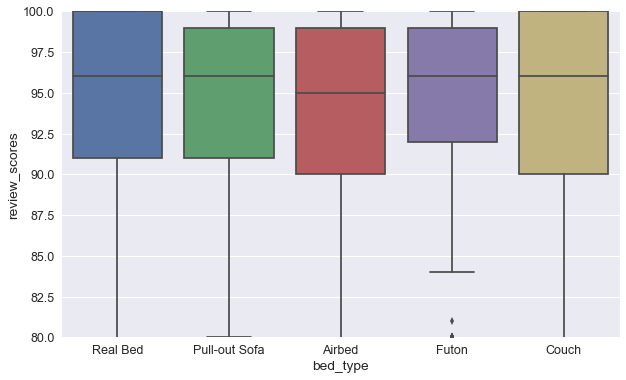

In [233]:
var = 'bed_type'
data = pd.concat([df2['review_scores'], df2[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="review_scores", data=data)
fig.axis(ymin=80, ymax=100)

In [234]:
d={'review_scores': ['mean' , 'count']}
review_bed=df2[['review_scores','bed_type']]
review_bed_mean=review_bed.groupby('bed_type').agg(d).round(2)
review_bed_mean

review_scores       
                       mean  count
bed_type                          
Airbed                92.72    197
Couch                 94.55     88
Futon                 94.30    315
Pull-out Sofa         93.69    255
Real Bed              93.74  37465

(-0.5, 2.5, 0, 100)

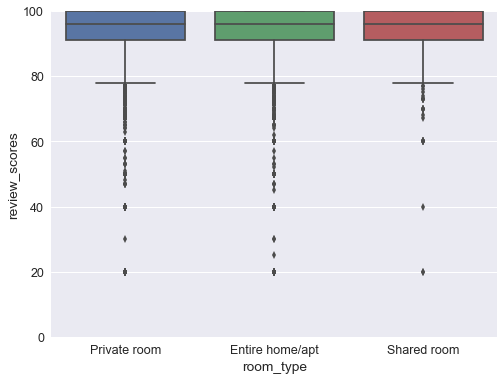

In [235]:
var = 'room_type'
data = pd.concat([df2['review_scores'], df2[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="review_scores", data=data)
fig.axis(ymin=0, ymax=100)

In [236]:
d={'review_scores': ['mean' , 'count']}
review_room=df2[['review_scores','room_type']]
review_room_mean=review_room.groupby('room_type').agg(d).round(2)
review_room_mean

review_scores       
                         mean  count
room_type                           
Entire home/apt         93.72  19994
Private room            93.75  17521
Shared room             94.04    805

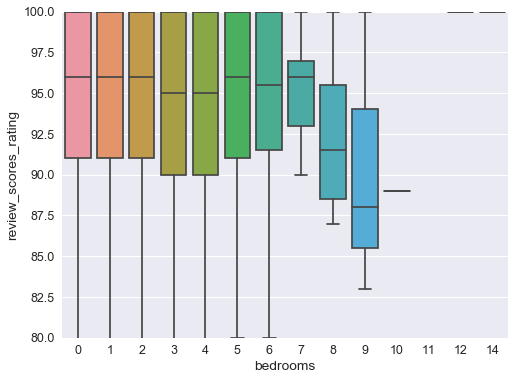

In [237]:
var = 'bedrooms'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="review_scores_rating", data=data)
fig.axis(ymin=80, ymax=100);


In [238]:
d={'review_scores_rating': ['mean' , 'count']}
review_bedroom=df[['review_scores_rating','bedrooms']]
review_bedroom_mean=review_bedroom.groupby('bedrooms').agg(d).round(2)
review_bedroom_mean

review_scores_rating       
                         mean  count
bedrooms                            
0                       93.55   3729
1                       93.76  27067
2                       93.57   5355
3                       93.39   1598
4                       93.38    426
5                       93.83     94
6                       94.14     22
7                       95.23     13
8                       92.50      4
9                       90.33      3
10                      89.00      1
11                      75.00      1
12                     100.00      1
14                     100.00      1

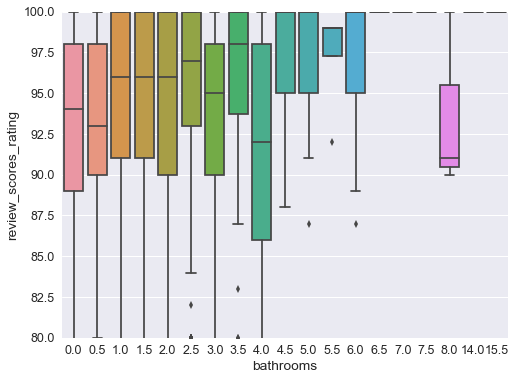

In [239]:
var = 'bathrooms'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="review_scores_rating", data=data)
fig.axis(ymin=80, ymax=100);

In [240]:
d={'review_scores_rating': ['mean' , 'count']}
reivew_bathroom=df[['review_scores_rating','bathrooms']]
reivew_bathroom_mean=reivew_bathroom.groupby('bathrooms').agg(d).round(2)
reivew_bathroom_mean

review_scores_rating       
                          mean  count
bathrooms                            
0.0                      91.07    152
0.5                      91.22     68
1.0                      93.75  32961
1.5                      93.77   1549
2.0                      93.18   2839
2.5                      94.31    335
3.0                      93.05    230
3.5                      96.07     60
4.0                      90.20     74
4.5                      95.44      9
5.0                      96.89      9
5.5                      97.25      4
6.0                      96.62     13
6.5                     100.00      2
7.0                     100.00      4
7.5                     100.00      1
8.0                      93.67      3
14.0                    100.00      1
15.5                    100.00      1

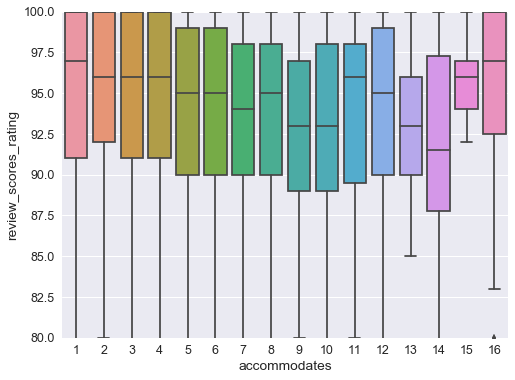

In [241]:
var = 'accommodates'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="review_scores_rating", data=data)
fig.axis(ymin=80, ymax=100);

In [242]:
d={'review_scores_rating': ['mean' , 'count']}
reivew_accommodates=df[['review_scores_rating','accommodates']]
reivew_accommodates_mean=reivew_accommodates.groupby('accommodates').agg(d).round(2)
reivew_accommodates_mean

review_scores_rating       
                             mean  count
accommodates                            
1                           93.84   4951
2                           93.82  17540
3                           93.60   4561
4                           93.86   5971
5                           93.00   1626
6                           93.10   2000
7                           92.72    449
8                           93.47    579
9                           92.24    106
10                          91.78    248
11                          93.08     40
12                          93.49    101
13                          90.69     13
14                          90.54     24
15                          95.73     11
16                          95.37     95

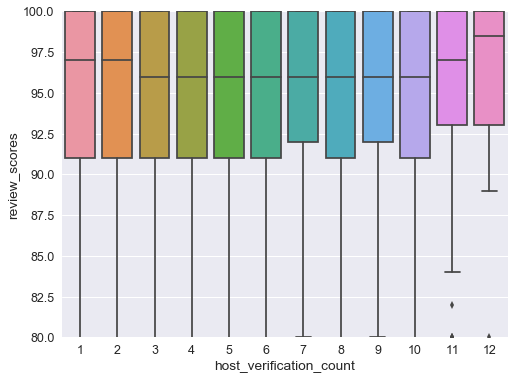

In [243]:
var='host_verification_count'
data = pd.concat([df2['review_scores'], df2[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="review_scores", data=data)
fig.axis(ymin=80, ymax=100);

In [244]:
d={'review_scores': ['mean' , 'count']}
review_count=df2[['review_scores','host_verification_count']]
review_count_mean=review_count.groupby('host_verification_count').agg(d).round(2)
review_count_mean

review_scores      
                                 mean count
host_verification_count                    
1                               93.61   585
2                               93.58  3143
3                               93.89  5785
4                               93.64  6983
5                               93.65  8496
6                               93.60  6040
7                               94.18  2933
8                               93.85  2496
9                               93.89  1309
10                              93.84   367
11                              95.14   169
12                              95.50    14

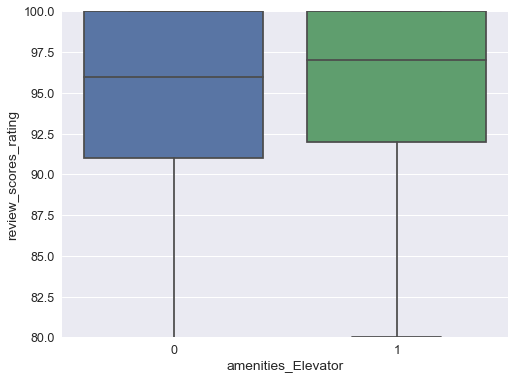

In [245]:
var='amenities_Elevator'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,y="review_scores_rating", data=data)
fig.axis(ymin=80, ymax=100);

In [246]:
df.groupby('amenities_Elevator')['review_scores_rating'].mean()

amenities_Elevator
0    93.483048
1    94.279454
Name: review_scores_rating, dtype: float64

In [247]:
df.groupby('amenities_Elevator')['review_scores_rating'].std()

amenities_Elevator
0    8.439921
1    8.810077
Name: review_scores_rating, dtype: float64

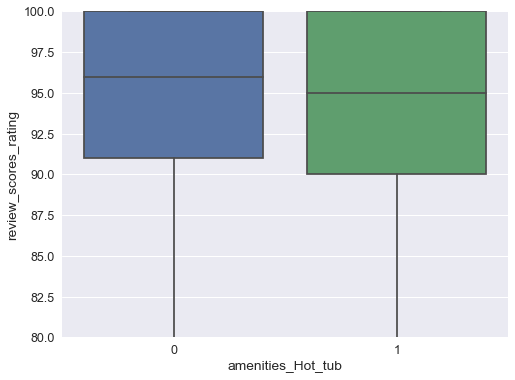

In [248]:
var='amenities_Hot_tub'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,y="review_scores_rating", data=data)
fig.axis(ymin=80, ymax=100);

In [249]:
df.groupby('amenities_Hot_tub')['review_scores_rating'].mean()

amenities_Hot_tub
0    93.754174
1    92.077827
Name: review_scores_rating, dtype: float64

In [250]:
df.groupby('amenities_Hot_tub')['review_scores_rating'].std()

amenities_Hot_tub
0     8.394966
1    11.844503
Name: review_scores_rating, dtype: float64

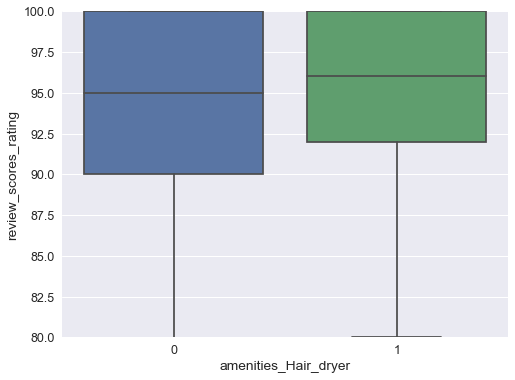

In [251]:
var='amenities_Hair_dryer'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,y="review_scores_rating", data=data)
fig.axis(ymin=80, ymax=100);

In [252]:
df.groupby('amenities_Hair_dryer')['review_scores_rating'].mean()

amenities_Hair_dryer
0    92.519651
1    94.287403
Name: review_scores_rating, dtype: float64

In [253]:
df.groupby('amenities_Hair_dryer')['review_scores_rating'].std()

amenities_Hair_dryer
0    10.360768
1     7.396051
Name: review_scores_rating, dtype: float64

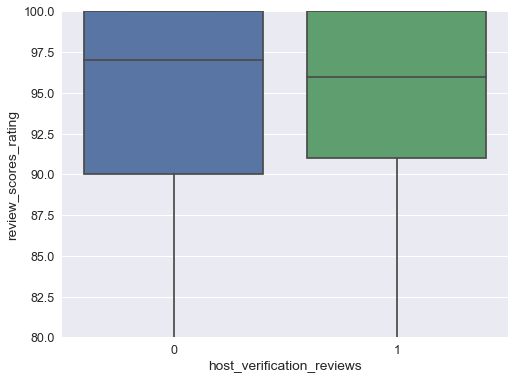

In [254]:
var='host_verification_reviews'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,y="review_scores_rating", data=data)
fig.axis(ymin=80, ymax=100);

In [255]:
df.groupby('host_verification_reviews')['review_scores_rating'].mean()

host_verification_reviews
0    92.685457
1    93.790795
Name: review_scores_rating, dtype: float64

In [256]:
df.groupby('host_verification_reviews')['review_scores_rating'].std()

host_verification_reviews
0    13.003265
1     7.987005
Name: review_scores_rating, dtype: float64

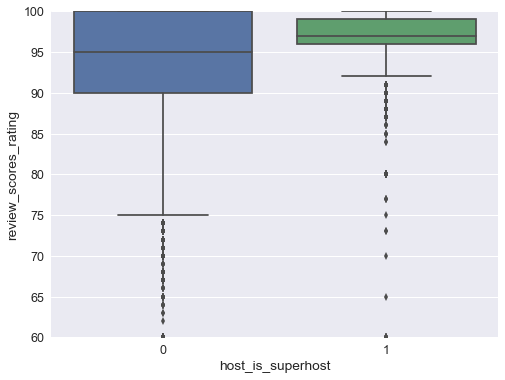

In [257]:
var='host_is_superhost'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,y="review_scores_rating", data=data)
fig.axis(ymin=60, ymax=100);

In [258]:
df.groupby('host_is_superhost')['review_scores_rating'].mean()

host_is_superhost
0    92.889172
1    96.882878
Name: review_scores_rating, dtype: float64

In [259]:
df.groupby('host_is_superhost')['review_scores_rating'].std()

host_is_superhost
0    9.261056
1    3.158776
Name: review_scores_rating, dtype: float64

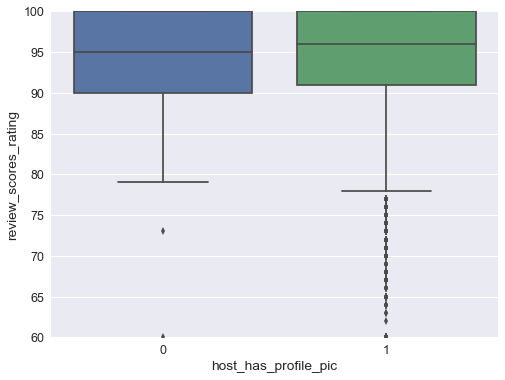

In [260]:
var='host_has_profile_pic'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,y="review_scores_rating", data=data)
fig.axis(ymin=60, ymax=100);

In [261]:
df.groupby('host_verification_reviews')['review_scores_rating'].mean()

host_verification_reviews
0    92.685457
1    93.790795
Name: review_scores_rating, dtype: float64

In [262]:
df.groupby('host_verification_reviews')['review_scores_rating'].std()

host_verification_reviews
0    13.003265
1     7.987005
Name: review_scores_rating, dtype: float64

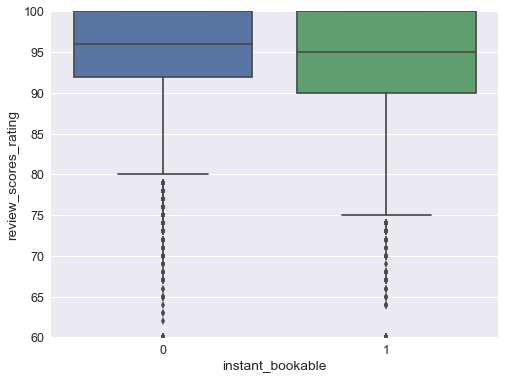

In [263]:
var='instant_bookable'
data = pd.concat([df['review_scores_rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,y="review_scores_rating", data=data)
fig.axis(ymin=60, ymax=100);

In [264]:
df.groupby('host_verification_reviews')['review_scores_rating'].mean()

host_verification_reviews
0    92.685457
1    93.790795
Name: review_scores_rating, dtype: float64

In [265]:
df.groupby('host_verification_reviews')['review_scores_rating'].std()

host_verification_reviews
0    13.003265
1     7.987005
Name: review_scores_rating, dtype: float64

In [266]:
# missing data 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
review_scores_rating,0,0.0
amenities_Changing_table,0,0.0
amenities_High_chair,0,0.0
amenities_Cooking_basics,0,0.0
amenities_Hair_dryer,0,0.0
amenities_Wide_clearance_to_shower,0,0.0


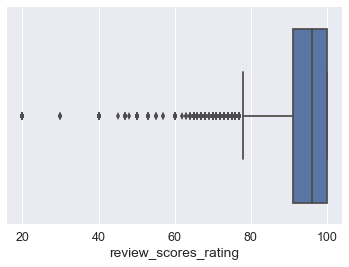

In [267]:
# univariate analysis
# outliers
sns.boxplot(x=df['review_scores_rating'])

In [268]:
# z-score
z = np.abs(stats.zscore(df['review_scores_rating']))
threshold = 3
print(np.where(z > 3))

(array([  107,   237,   551,   886,  1481,  1698,  1821,  1841,  2173,
        2209,  2260,  2367,  2372,  2546,  2905,  2952,  3227,  3371,
        3485,  3606,  3630,  3703,  3709,  3750,  3768,  3978,  4069,
        4115,  4257,  4306,  4319,  4618,  4948,  4959,  4966,  4968,
        5124,  5244,  5330,  5399,  5611,  5642,  5694,  5767,  5818,
        5837,  5857,  5875,  5921,  6197,  6328,  6445,  6448,  6461,
        6468,  6551,  6720,  7085,  7098,  7245,  7277,  7350,  7395,
        7400,  7425,  7587,  7667,  7846,  7937,  7945,  7955,  8242,
        8364,  8541,  8691,  8725,  8739,  8817,  8856,  8988,  9022,
        9085,  9143,  9216,  9412,  9497,  9626,  9633,  9653,  9660,
        9726,  9827,  9837, 10084, 10104, 10150, 10152, 10253, 10303,
       10309, 10319, 10407, 10432, 10655, 10665, 10674, 10689, 10739,
       10750, 10756, 10839, 10917, 10990, 11035, 11217, 11385, 11397,
       11440, 11478, 11486, 11643, 11748, 11749, 11763, 11833, 11843,
       11892, 12045

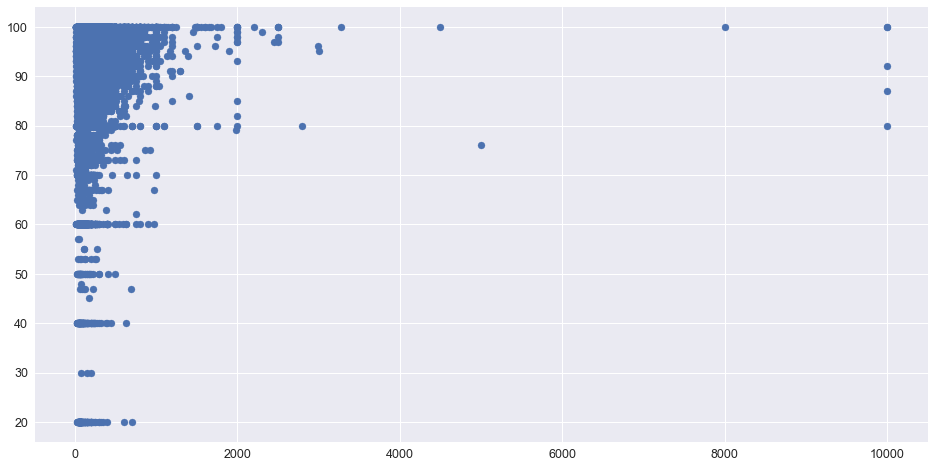

In [269]:
# bivaraite analysis for outlier
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['price'], df['review_scores_rating'])
plt.show()


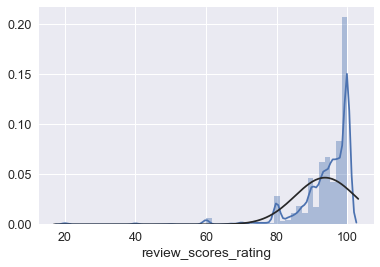

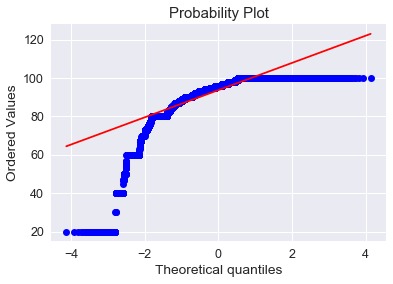

In [270]:
# normality 
sns.distplot(df['review_scores_rating'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['review_scores_rating'], plot=plt)

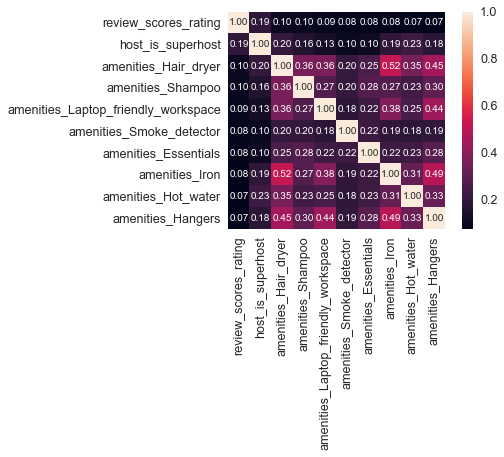

In [271]:
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'review_scores_rating')['review_scores_rating'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()